# ПРОЕКТ Игра Яндекс Практикум

# Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
from pymystem3 import Mystem
m = Mystem()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
df = pd.read_csv("/datasets/games.csv", sep=",")

print(df.info())
display(df.describe())

# display(df)
# for column in df.columns:
#     display(df[column].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


# Шаг 2. Подготовьте данные

## Замените названия столбцов (приведите к нижнему регистру);

In [3]:
df.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']
print(df.columns)
columns = []
for c in df.columns:
    columns.append(c.lower())
df.columns = columns
print(df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')
Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


## Преобразуем данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

In [4]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Поменяем в столбце year_of_release тип на Int32, так как год пишут целым числом.

In [5]:
df['year_of_release'] = df['year_of_release'].astype('Int32')
df['year_of_release'].dtype

Int32Dtype()

В других столбцах менять типы пока что нет смысла.

## Обработайте пропуски при необходимости

### Объясните, почему заполнили пропуски определённым образом или почему не стали это делать?

#### Столбец name

In [6]:
df.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [7]:
df.query('platform=="GEN" and year_of_release==1993')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
7885,Shining Force II,GEN,1993,Strategy,0.00,0.00,0.19,0.00,NaN,NaN,NaN
8893,Super Street Fighter II,GEN,1993,Fighting,0.00,0.00,0.15,0.00,NaN,NaN,NaN
11986,Ecco: The Tides of Time,GEN,1993,Adventure,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12098,Street Fighter II': Special Champion Edition (...,GEN,1993,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12264,Streets of Rage 3,GEN,1993,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12984,Dynamite Headdy,GEN,1993,Platform,0.00,0.00,0.05,0.00,NaN,NaN,NaN
13343,Beyond Oasis,GEN,1993,Role-Playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Не вижу возможности узнать имя игр, да и в других столбцах тоже есть пропуски , поэтому удалим эти 2 строки, так как 2 строки против 15 тысяч незначительно мало

In [8]:
print('До удаления',len(df))
df.dropna(subset=['name'], inplace=True)
df.reset_index(inplace=True,drop=True)
print('После удаления',len(df))

До удаления 16715
После удаления 16713


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int32(1), float64(5), object(5)
memory usage: 1.4+ MB


Названия игр часто бывают оригинальными и возможно не подпадут под лемматизацию, всё же попробуем это сделать, чтобы найти одни и теже имена , которые написаны по разному

In [10]:
# Функция получает строку - лемматизирует её, затем собирает и возвращает результат
def lemm_list(st):
    w = m.lemmatize(st)
    w.pop()
    return ''.join(w)

df['lemm_name'] = df['name'].apply(lemm_list)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,lemm_name
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,Wii Sports
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,Super Mario Bros.
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,Mario Kart Wii
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,Wii Sports Resort
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,Pokemon Red/Pokemon Blue
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,Samurai Warriors: Sanada Maru
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,LMA Manager 2007
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,Haitaka no Psychedelica
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,Spirits & Spells


А теперь посчитаем количество строк ".value_counts()" в обоих столбцах name и lemm_name, если кол-во совпадёт, то повторов нет

In [11]:
print(len(df['name'].value_counts() ), len(df['lemm_name'].value_counts()))

11559 11558


1 значение совпало, то есть в ".value_counts()" оно было = 1, а затем присоединилось к другому

In [12]:
lemm_name = df['lemm_name'].value_counts()
lemm_name

Need for Speed: Most Wanted                                                                           12
Ratatouille                                                                                            9
Madden NFL 07                                                                                          9
LEGO Marvel Super Heroes                                                                               9
FIFA 14                                                                                                9
                                                                                                      ..
Shaberu! DS Oryouri Navi: Marugoto Teikoku Hotel: Saikouhou no Ryouri-chou ga Oshieru Katei Ryouri     1
Scooby-Doo and the Cyber Chase                                                                         1
F-1 World Grand Prix                                                                                   1
Shadow Ops: Red Mercury                                

In [13]:
df.reset_index(drop=True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,lemm_name
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,Wii Sports
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,Super Mario Bros.
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,Mario Kart Wii
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,Wii Sports Resort
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,Pokemon Red/Pokemon Blue
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,Samurai Warriors: Sanada Maru
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,LMA Manager 2007
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,Haitaka no Psychedelica
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,Spirits & Spells


In [14]:
def seach_lem(st):
    i = st
    n = df.loc[i,'name']
    n_lem = df.loc[i,'lemm_name']
    if (df.query('name==@n')['name'].count()) != (df.query('lemm_name==@n_lem')['lemm_name'].count()):
        print(i, df.loc[i,'name'], df.loc[i,'lemm_name'])
df.reset_index()['index'].apply(seach_lem)

6444 Love Plus Love Plus
6945 Love Plus + Love Plus


0        None
1        None
2        None
3        None
4        None
         ... 
16708    None
16709    None
16710    None
16711    None
16712    None
Name: index, Length: 16713, dtype: object

In [15]:
df.loc[[6444,6945]]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,lemm_name
6444,Love Plus,DS,2009,Simulation,0.0,0.0,0.26,0.0,NaN,NaN,NaN,Love Plus
6945,Love Plus +,DS,2010,Simulation,0.0,0.0,0.23,0.0,NaN,NaN,NaN,Love Plus


Да уж странные 2 строки вроде одна и таже игра, одинаковая платформа, но 2 разных года выпуска 2009 и 2010, да еще и plus+(масло масленное), может это какое-то обновление? А посмотрим что скажет Яндекс по этому поводу?

http://gamebomb.ru/games/15179 LovePlus – симулятор знакомств для Nintendo DS, вышедший в 2009 году. После релиза последовали обновления и сиквелы, в том числе игра для iOS.
LovePlus+ – версия игры с новым контентом (выезды на пикники, фитнес-режимы, дни пропуска занятий по болезни, и пр.). Почти всё из оригинальной версии представлено в LovePlus+, наряду со многими новыми способами взаимодействия с девушками. Из оригинальной игры в LovePlus+ можно переносить данные.

LovePlus+ и LovePlus - будем считать, что это 2 разные игры. В остальном столбец в порядке

Удалим новый столбец он больше не пригодится

In [16]:
df.drop('lemm_name', axis=1, inplace=True)

In [17]:
df.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN


#### Столбец platform

Пропусков здесь нет, проверим корректность данных

In [18]:
df['platform'].value_counts().sort_index()

2600     133
3DO        3
3DS      520
DC        52
DS      2151
GB        98
GBA      822
GC       556
GEN       27
GG         1
N64      319
NES       98
NG        12
PC       974
PCFX       1
PS      1197
PS2     2161
PS3     1331
PS4      392
PSP     1209
PSV      430
SAT      173
SCD        6
SNES     239
TG16       2
WS         6
Wii     1320
WiiU     147
X360    1262
XB       824
XOne     247
Name: platform, dtype: int64

С платформами всё в порядке столбец корректен

#### Столбец year_of_release

In [19]:
df['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: Int64

С данными всё хорошо, займемся пропусками

In [20]:
display(df[df['year_of_release'].isna()])
print('Кол-во пропусков =', df['year_of_release'].isna().sum())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Кол-во пропусков = 269


Попробуем заполнить year_of_release из расчета, что игра в которой пропуск, выпускалась и на другой платформе где есть значение года выпуска. Если есть, то пропуск заполним медианой (округленной до целого) этих(этого) значений. Заполняем Медианой так как одна игра могла выходить на нескольких платформах (аж до 12 платформ)

In [21]:
name_release_dict = {}
name_release_dict_keys = df.loc[df['year_of_release'].isna()==True,'name'].unique()
print("Максимальная длина словаря 'name_release_dict' =",len(name_release_dict_keys))
nan_values = 0
for name in name_release_dict_keys:
#     print(name)
    val = df[df['name']==name]['year_of_release'].dropna().median()
    if pd.isna(val) == False:       # ПРОПУСКАЕТ nan ВНУТРЬ if ПОЧЕМУ ?
#         print(int(round(val)))
        name_release_dict[name] = int(round(val))
    else:
        nan_values += 1

print('nan_values =', nan_values)
print("Длина словаря после формирования 'name_release_dict' =",len(name_release_dict))   
# display(name_release_dict)

Максимальная длина словаря 'name_release_dict' = 232
nan_values = 133
Длина словаря после формирования 'name_release_dict' = 99


In [22]:
def fill_release(st):
#     print(st)
    if st in name_release_dict:
#         print(name_release_dict.get(st))
        return name_release_dict.get(st)
df.loc[df['year_of_release'].isna(), 'year_of_release'] = df.loc[df['year_of_release'].isna(), 'name'].apply(fill_release)

In [23]:
df[df['year_of_release'].isna()]['name'].values

array(['wwe Smackdown vs. Raw 2006', 'Rock Band',
       "Frogger's Adventures: Temple of the Frog", 'Rock Band',
       'Rock Band', 'Triple Play 99', 'Adventure', 'Combat', 'Rock Band',
       'Legacy of Kain: Soul Reaver', 'Donkey Kong Land III',
       'Air-Sea Battle', 'Suikoden III', 'Yakuza 4',
       'WarioWare: Twisted!', 'Test Drive Unlimited 2',
       'Monster Hunter 2', 'Test Drive Unlimited 2',
       'Advance Wars: Days of Ruin', 'Fishing Derby', 'Karate',
       'Circus Atari',
       'The Chronicles of Riddick: Escape from Butcher Bay',
       "Maze Craze: A Game of Cops 'n Robbers", 'Silent Hill: Homecoming',
       'Super Breakout', "Robert Ludlum's The Bourne Conspiracy",
       'NHL Slapshot', 'TERA', 'NFL GameDay 2003',
       'Harvest Moon: Save the Homeland',
       "Robert Ludlum's The Bourne Conspiracy", 'Silent Hill: Homecoming',
       'Hangman', "Cubix Robots for Everyone: Clash 'n' Bash",
       'Dragon Ball Z: Budokai Tenkaichi 2 (JP sales)', 'Dragster',


In [24]:
df[df['year_of_release'].isna()]['name'].count()

146

Осталось 146 пропусков, удалять строки с ними не будем (пока), возможно пригодятся значения с продажами. Просто запомним, что здесь есть пропуски на будущее.

#### Столбец genre

In [25]:
df['genre'].value_counts().sort_index()

Action          3369
Adventure       1303
Fighting         849
Misc            1750
Platform         888
Puzzle           580
Racing          1249
Role-Playing    1498
Shooter         1323
Simulation       873
Sports          2348
Strategy         683
Name: genre, dtype: int64

Пропусков нет, имена жанров в порядке, хороший столбец. Всё корректно

#### Столбец na_sales

In [26]:
df['na_sales'].describe()

count    16713.000000
mean         0.263302
std          0.813565
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64

Всё корректно

#### Столбец eu_sales

In [27]:
df['eu_sales'].describe()

count    16713.000000
mean         0.145045
std          0.503359
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64

Всё корректно

#### Столбец jp_sales

In [28]:
df['jp_sales'].describe()

count    16713.000000
mean         0.077625
std          0.308871
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64

Всё корректно

#### Столбец other_sales

In [29]:
df['other_sales'].describe()

count    16713.000000
mean         0.047343
std          0.186742
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64

Всё корректно

#### Столбец critic_score и user_score

Обработаем пропуски в этих двух столбцах по одному алгоритму, - в зависимости от продаж: чем больше продажи, тем больше рейтинг

In [30]:
display(df['critic_score'].describe())
display(df['critic_score'].value_counts())

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
29.0      3
13.0      1
22.0      1
17.0      1
21.0      1
Name: critic_score, Length: 82, dtype: int64

Присутствующие данные столбца critic_score корректны

Рассмотрим столбец user_score

In [31]:
display(df[['user_score']].describe())
display(df['user_score'].value_counts())

,user_score
count,10014
unique,96
top,tbd
freq,2424


tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.7       2
1.1       2
0.3       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Посмотрим в интернете, что значит "tbd"
https://fb.ru/article/171345/tbd---chto-znachit-eto-sokraschenie
...расшифровывается очень просто - To Be Determined, то есть "Будет определено".
Выведем на экран строки с "tbd"

In [32]:
display(df[df['user_score']=="tbd"])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16693,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16695,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16696,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16702,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Было предположение, что это рейтинги игр, вышедших в последний год, - поэтому рейтинг и не определен. Но предположение оказалось ложным. Закономерность появления "tbd" не прослеживается. Поэтому заменим их на NaN и тогда уже обработаем оба столбца вместе

И поменяем тип на float

In [33]:
print("В 'user_score' Nan было =", df['user_score'].isna().sum())
df.loc[df['user_score']=="tbd", 'user_score']=np.nan
df['user_score'] = df['user_score'].astype(float)

В 'user_score' Nan было = 6699


In [34]:
print("В 'user_score' Nan стало =", df['user_score'].isna().sum())
display(df['user_score'].value_counts())

В 'user_score' Nan стало = 9123


7.8    324
8.0    290
8.2    282
8.3    254
8.5    253
      ... 
0.9      2
1.9      2
1.3      2
9.7      1
0.0      1
Name: user_score, Length: 95, dtype: int64

In [35]:
df[['critic_score','user_score','na_sales','eu_sales','jp_sales','other_sales']].describe()

,critic_score,user_score,na_sales,eu_sales,jp_sales,other_sales
count,8137.000000,7590.000000,16713.000000,16713.000000,16713.000000,16713.000000
mean,68.967679,7.125046,0.263302,0.145045,0.077625,0.047343
std,13.938165,1.500006,0.813565,0.503359,0.308871,0.186742
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,6.400000,0.000000,0.000000,0.000000,0.000000
50%,71.000000,7.500000,0.080000,0.020000,0.000000,0.010000
75%,79.000000,8.200000,0.240000,0.110000,0.040000,0.030000
max,98.000000,9.700000,41.360000,28.960000,10.220000,10.570000


In [36]:
# ВАРИАНТ №1
critic_full = df.loc[df['critic_score'].isna()==False,['critic_score', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
display(critic_full.head())

for column in critic_full.columns:
    print('Сумма столбца', column, '=', critic_full[column].sum()) # Для интереса выведем суммы в каждом столбце
print()

udel_critic = ( critic_full['na_sales'].sum() + critic_full['eu_sales'].sum() + \
            critic_full['jp_sales'].sum() + critic_full['other_sales'].sum() ) / critic_full['critic_score'].sum()
print("Удельная величина продаж на 1 единицу critic_score =", udel_critic)

,critic_score,na_sales,eu_sales,jp_sales,other_sales
0,76.0,41.36,28.96,3.77,8.45
2,82.0,15.68,12.76,3.79,3.29
3,80.0,15.61,10.93,3.28,2.95
6,89.0,11.28,9.14,6.50,2.88
7,58.0,13.96,9.18,2.93,2.84


Сумма столбца critic_score = 561190.0
Сумма столбца na_sales = 2872.2000000000007
Сумма столбца eu_sales = 1695.0300000000002
Сумма столбца jp_sales = 447.76
Сумма столбца other_sales = 589.4000000000001

Удельная величина продаж на 1 единицу critic_score = 0.009986617723052801


Чтобы заполнить пропуски в critic_score и user_score найдем удельные значения, для строк где присутствуют данные - сколько продаж (по четырем регионам) приходится на 1 единицу critic_score и user_score. Затем чтобы найти пропущенное значение в critic_score и user_score подсчитаем продажи для одной строки и разделим на удельные значения

Посчитаем среднее от удельных значений для каждой игры где присутствует значение critic_score

In [37]:
udel_mean = ((critic_full['na_sales'] + critic_full['eu_sales'] + critic_full['jp_sales'] + \
             critic_full['other_sales'])/critic_full['critic_score']).mean()
udel_mean

0.009144249647242584

Вполне закономерно

In [38]:
score_sales = critic_full.set_index(critic_full['na_sales'] + critic_full['eu_sales'] + critic_full['jp_sales'] + \
             critic_full['other_sales'])['critic_score']

score_sales.reset_index().describe()

,index,critic_score
count,8137.000000,8137.000000
mean,0.688754,68.967679
std,1.816956,13.938165
min,0.010000,13.000000
25%,0.100000,60.000000
50%,0.250000,71.000000
75%,0.650000,79.000000
max,82.540000,98.000000


Похоже так заполнить не получится из-зи слишком большой разницы в продажах (от 0,01 до 82,54)

Попробуем ВАРИАНТ №3:

In [39]:
df.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
year_of_release,1.000000,-0.092678,0.003913,-0.168249,0.037584,0.011489,-0.265376
na_sales,-0.092678,1.000000,0.765341,0.449668,0.638695,0.240755,0.086200
eu_sales,0.003913,0.765341,1.000000,0.435079,0.722796,0.220752,0.055337
jp_sales,-0.168249,0.449668,0.435079,1.000000,0.291090,0.152593,0.125598
other_sales,0.037584,0.638695,0.722796,0.291090,1.000000,0.198554,0.057119
critic_score,0.011489,0.240755,0.220752,0.152593,0.198554,1.000000,0.580878
user_score,-0.265376,0.086200,0.055337,0.125598,0.057119,0.580878,1.000000


Видно, что наибольшая корреляция для столбцов critic_score иuser_score между собой (0,58 - средняя) - и это логично.

In [40]:
print('Оба столбца Заполнены(nan=False)',((df['critic_score'].isna()==False) & (df['user_score'].isna()==False)).sum())
print('Оба столбца Пустые(nan=True)',((df['critic_score'].isna()) & (df['user_score'].isna())).sum())
print(f'Максимально сможем заполнить еще ДО {len(df)-8003-7017} строк (df-8003-7017) ')

Оба столбца Заполнены(nan=False) 7017
Оба столбца Пустые(nan=True) 8003
Максимально сможем заполнить еще ДО 1693 строк (df-8003-7017) 


Можно составить фрейм/словарь соответствия critic_score иuser_score (и наоборот) из тех строк, где значения присутствуют в обоих столбцах

In [41]:
print('Пустые user_score =', (df['user_score'].isna()==True).sum(),'/ Заполненые critic_score =', \
      (df['critic_score'].isna()==False).sum(), "пересечение =",((df['critic_score'].isna()==True) & \
                                                                 (df['user_score'].isna()==False)).sum())
print('Пустые critic_score =', (df['critic_score'].isna()==True).sum(),'/ Заполненые user_score =', \
      (df['user_score'].isna()==False).sum(), "пересечение =",((df['critic_score'].isna()==False) & \
                                                                 (df['user_score'].isna()==True)).sum())

Пустые user_score = 9123 / Заполненые critic_score = 8137 пересечение = 573
Пустые critic_score = 8576 / Заполненые user_score = 7590 пересечение = 1120


Итого максимально будет заполнено 8137 + 573 = 7590 + 1120 = 8710 (около половины). Не много ...

Создадим таблицу соответствия critic_score иuser_score (где присутствуют оба значения)

#### Столбец critic_score

In [42]:
critic_user = df.loc[(df['critic_score'].isna()==False) & (df['user_score'].isna()==False), ['critic_score','user_score']]
critic_user = critic_user.sort_values(by='user_score').reset_index(drop=True)
critic_user

,critic_score,user_score
0,39.0,0.5
1,36.0,0.5
2,72.0,0.6
3,32.0,0.7
4,28.0,0.9
...,...,...
7012,86.0,9.5
7013,78.0,9.5
7014,81.0,9.5
7015,81.0,9.6


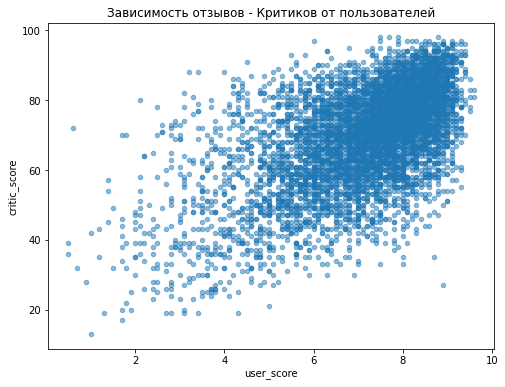

In [43]:
critic_user.plot(x='user_score', y='critic_score', kind='scatter',figsize=(8,6), alpha=0.5);
plt.title('Зависимость отзывов - Критиков от пользователей');

Корелляция действительно - средненькая ... (зато рисунок напоминает летящую комету)

In [44]:
def score_search(st):
    us_sc = st['user_score']
    if pd.isna(st['critic_score'])==False:
        return st['critic_score']
    else:
        mark_mean = critic_user.loc[critic_user['user_score'] == us_sc, 'critic_score'].mean()
        if pd.isna(mark_mean):
            up = critic_user.loc[critic_user['user_score'] >= us_sc, 'user_score'].min() # Минимальное из больших
            down = critic_user.loc[critic_user['user_score'] <= us_sc, 'user_score'].max() # Максимальное из меньших   
            mean_critic = ( critic_user.loc[critic_user['user_score'] == up, 'critic_score'].mean() + \
                           critic_user.loc[critic_user['user_score'] == down, 'critic_score'].mean() ) / 2
            return round(mean_critic, 1)
        else:
            return round(mark_mean, 1)

df['critic_score'] = df.apply(score_search, axis=1)

In [45]:
print('Заполненные critic_score =', (df['critic_score'].isna()==False).sum())

Заполненные critic_score = 8704


Заполнились 8704 строки,- почти все планируемые (8710) пропуски. Некоторые не заполнены так как попадались значения user_score выходящие за границы таблицы critic_user

#### Столбец user_score

In [46]:
critic_user = critic_user.sort_values(by='critic_score').reset_index(drop=True)
critic_user

,critic_score,user_score
0,13.0,1.0
1,17.0,1.7
2,19.0,3.4
3,19.0,2.7
4,19.0,1.3
...,...,...
7012,97.0,7.9
7013,98.0,8.8
7014,98.0,7.7
7015,98.0,7.5


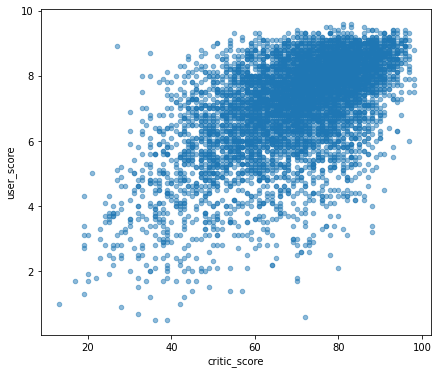

In [47]:
critic_user.plot(y='user_score', x='critic_score', kind='scatter',figsize=(7,6), alpha=0.5); 

In [48]:
def score_search2(st):
    cr_sc = st['critic_score']
    if pd.isna(st['user_score'])==False:
        return st['user_score']
    else:
        mark_mean = critic_user.loc[critic_user['critic_score'] == cr_sc, 'user_score'].mean() 
        if pd.isna(mark_mean):
            up = critic_user.loc[critic_user['critic_score'] >= cr_sc, 'critic_score'].min() # Минимальное из больших
            down = critic_user.loc[critic_user['critic_score'] <= cr_sc, 'critic_score'].max() # Максимальное из меньших   
            mean_critic = ( critic_user.loc[critic_user['critic_score'] == up, 'user_score'].mean() + \
                           critic_user.loc[critic_user['critic_score'] == down, 'user_score'].mean() ) / 2
            return round(mean_critic, 1)
        else:
            return round(mark_mean, 1)

df['user_score'] = df.apply(score_search2, axis=1)

# Очень долго обрабатывает

In [49]:
print('Заполненные user_score =', (df['user_score'].isna()==False).sum())

Заполненные user_score = 8710


Заполнились все планируемые 8710 строк.

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16567 non-null  Int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8704 non-null   float64
 9   user_score       8710 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int32(1), float64(6), object(4)
memory usage: 1.4+ MB


Заполнили всё, что возможно. Остальные строки если заполнять какими либо средними, то можно исказить сильно данные. Поэтому оставляем как есть, и будем использовать для анализа то, что имеем.

#### Столбец rating

In [51]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [52]:
print(df['rating'].value_counts(), df['rating'].isna().sum())

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64 6764


В начале анализа было видно, что много игр которые вышли на разных платформах. Поэтому встречаются одинаковые имена, а игра одна и таже - значит и возрастной рейтинг должен быть один и тот же. Составим словарь имя-рейтинг name_rating и заполним в соостветствии с ним пропуски в столбце rating

In [53]:
name_rating = df.set_index("name")['rating'].dropna().to_dict()
# print(name_rating)
def rat(st):
    if pd.isna(st['rating']):
#         print(st['rating'], name_rating.get(st['name']))
        return name_rating.get(st['name'])
    return st['rating']

df['rating'] = df.apply(rat, axis=1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16567 non-null  Int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8704 non-null   float64
 9   user_score       8710 non-null   float64
 10  rating           10386 non-null  object 
dtypes: Int32(1), float64(6), object(4)
memory usage: 1.4+ MB
None


Удалось заполнить совсем не много (10386-9949) - 437 пропусков. Оставшиеся пропуски заполнить не вижу возможности (логически/по_смыслу с другими столбцами не связан).

In [54]:
# Проверим на всякий случай дубликаты
df.duplicated().sum()

0

Как и следовало ожидать дубликатов нет


## Суммарые продажи во всех регионах

In [55]:
df.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,None


In [56]:
df['sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,None,40.24


Столбец готов!

# Шаг 3. Проведите исследовательский анализ данных

# 3.1 Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды

In [57]:
time_release = df.groupby('year_of_release')['name'].count().reset_index()
time_release.columns = ['year', 'quantity']
time_release

,year,quantity
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


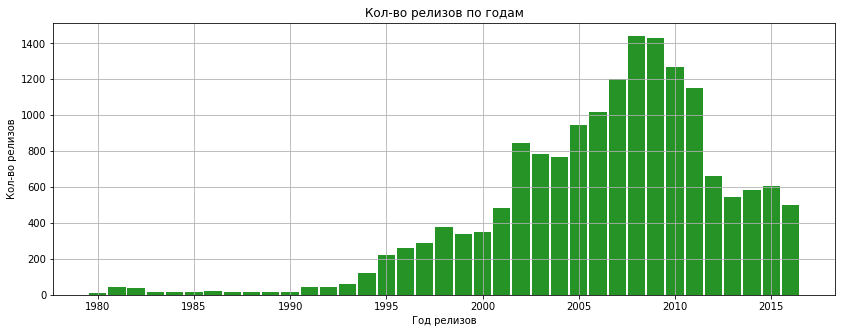

In [58]:
plt.figure(figsize=(14, 5))
plt.bar(time_release['year'], time_release['quantity'], label='Кол-во релизов за год', color='g', alpha=0.85, width=0.9)
plt.xlabel('Год релизов')
plt.ylabel('Кол-во релизов')
plt.grid()
plt.title(f'Кол-во релизов по годам')
# plt.legend()
plt.show();

Вывод: Период до 1994 года характеризуется малой активностью. Хорошо видно, что важный период в релизах игр наступает в 1994 году - и после него начинается бум - компьютерные игры захватывают мир. В 2010 наступает переломный момент и уже в 2012 релизы падают в 2 раза и до 2016 держатся примерно на одно уровне

# 3.2  Посмотрите, как менялись продажи по платформам.

In [59]:
plf = df.groupby('platform')['sales'].sum().sort_values().reset_index()
plf

,platform,sales
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42
5,NG,1.44
6,SCD,1.86
7,DC,15.95
8,GEN,28.35
9,SAT,33.59


Возьмем около 10 платформ с наибольшими объемами продаж. Построим по ним распределение продаж по годам

In [60]:
popul_platforms = plf.loc[17:30, 'platform'].values
popul_platforms

array(['NES', 'GB', 'XB', '3DS', 'PC', 'PSP', 'PS4', 'GBA', 'PS', 'DS',
       'Wii', 'PS3', 'X360', 'PS2'], dtype=object)

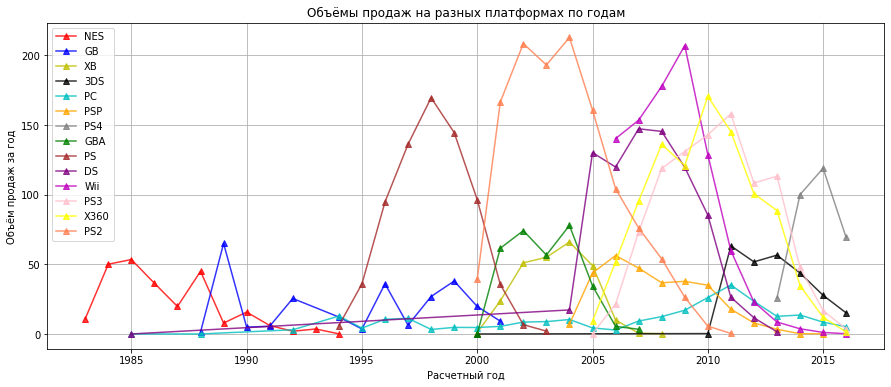

In [61]:
color = ['r','b','y','black','c','orange','grey','green','brown','purple','m','pink','yellow','coral','darkcyan','dimgray','lime']

plt.figure(figsize=(15, 6))
plt.grid()
plt.title('Объёмы продаж на разных платформах по годам')

mean_year_life = 0
for i in range(0,len(popul_platforms)):
    platform  = df.query('platform == @popul_platforms[@i]').groupby('year_of_release')['sales'].sum()
    mean_year_life += platform.count()
#     plt.plot(platform.index, platform.values, label=popul_platforms[i], color=color[i], alpha=0.8);
#     plt.bar(platform.index+(-3/6 + i/6), platform.values, label=popul_platforms[i], color=color[i], alpha=0.8, width=1/6);
    platform.plot(x=platform.index, y=platform.values, style='-^', color=color[i], \
                  label=popul_platforms[i], alpha=0.8, grid=True);
plt.xlabel('Расчетный год')    
plt.ylabel('Объём продаж за год')
plt.legend()
plt.show();


Подсчитаем срок жизни платформы вручную - расчетное значение

In [62]:
mean_year_life/len(popul_platforms)

11.428571428571429

Вывод: Расчетное значение 11,4 года, а из графика видно, что срок активного существования платформ 9-10 лет(если не обращать внимания на минимальные значения по краям), и распределение продаж идет близко к нормальному распределению. Поэтому будем считать,что срок средний существования платформы - 10-12 лет. Можно выделить из списка платформ - "PC" (компьютеры, наверное), они хоть и не в топах по выручке, но актуальны во все времена. Также надо отметить,что платформа "DS" просуществовала очень долго - до 2013 года.

# 3.3 Прогноз на 2017 год

Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

In [63]:
platform2017 = df.pivot_table(index='year_of_release', columns='platform', values='sales', aggfunc='sum').\
    query('year_of_release>2004').fillna(0).reset_index()
platform2017['year_of_release'] = platform2017['year_of_release'].astype('Int64')

for column in platform2017.columns:
    if platform2017[column].sum()==0:
        platform2017.drop(column, axis=1,inplace=True)

display(platform2017)

platform,year_of_release,3DS,DC,DS,GBA,GC,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
0,2005,0.00,0.00,130.14,34.53,27.91,4.38,160.66,0.19,0.00,43.84,0.00,0.00,0.00,9.22,49.09,0.00
1,2006,0.00,0.00,119.81,5.46,11.55,2.85,104.24,21.44,0.00,56.28,0.00,140.19,0.00,51.79,10.04,0.00
2,2007,0.00,0.02,147.23,3.40,0.27,9.28,76.10,73.19,0.00,47.30,0.00,153.41,0.00,95.41,0.55,0.00
3,2008,0.00,0.04,145.36,0.00,0.00,12.46,53.90,118.79,0.00,36.76,0.00,177.68,0.00,136.07,0.18,0.00
4,2009,0.00,0.00,119.56,0.00,0.00,17.05,26.40,130.93,0.00,37.78,0.00,206.97,0.00,120.82,0.00,0.00
5,2010,0.30,0.00,85.35,0.00,0.00,26.15,5.64,142.96,0.00,35.04,0.00,128.67,0.00,170.55,0.00,0.00
6,2011,63.20,0.00,26.33,0.00,0.00,35.16,0.45,157.98,0.00,17.82,4.63,59.79,0.00,145.23,0.00,0.00
7,2012,51.76,0.00,11.67,0.00,0.00,23.45,0.00,108.28,0.00,7.95,16.19,22.94,17.56,100.72,0.00,0.00
8,2013,56.57,0.00,1.54,0.00,0.00,12.66,0.00,113.25,25.99,3.38,10.59,8.59,21.65,88.58,0.00,18.96
9,2014,43.76,0.00,0.00,0.00,0.00,13.63,0.00,47.76,100.00,0.24,11.90,3.75,22.03,34.74,0.00,54.07


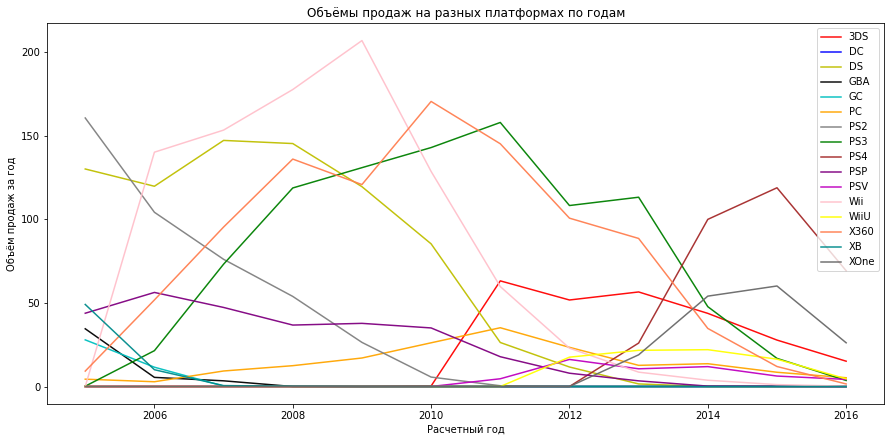

In [64]:
plt.figure(figsize=(15, 7))
plt.grid()
plt.title('Объёмы продаж на разных платформах по годам')

i=0
for column in platform2017.columns[1:]:
    plt.plot(platform2017['year_of_release'].to_list(), platform2017[column].to_list(), label=column, color=color[i], alpha=0.95);
    i+=1 # В верхней строчке выдает ошибку

plt.grid()
plt.xlabel('Расчетный год')    
plt.ylabel('Объём продаж за год')
plt.legend()
plt.show();

Вывод: Видно , что многие популярные платформы, такие как: Wii, PS3, X360, PSP, - прошли свой цикл развития 10-12 лет, и как раз в районе текущего 2016 года завершающий аккорд (другие платформы PS2, DS, GBA, XB, закончилиь еще раньще) - во все эти платформы вкладываться не стоит их развитие закончилось

Но есть две платформы PS4 и XOne, которые появились относительно недавно в 2013 году и уже завоевали потребителя в 2014 и 2015 рост, а в 2016 был спад; их жизненный цикл еше не дошёл даже до середины, поэтому будет логично воспользоваться спадом и развивать эти , на данный момент самые перспективные, платформы!

Еще есть другие 3 платформы, которые появились пораньше PSV(слабое развитие) в 2011 / WiiU в 2012 / 3DS в 2011 и на данные момент на середине своего цикла развития, поэтому вложения в эти платформы должны быть умеренными

Также надо обратить внимание платформу PC , которая существуют уже очень долго и стабильно, она актуальна во все времена (но в небольших объемах).

Теперь коротко: Флагманы - PS4 и XOne! PSV, WiiU и 3DS - тоже можно продолжать развивать, но в меньших объемах(PSV - развитие идет слабо, поэтому приоритет у WiiU и 3DS); платформа PC - актуальна всегда(но в малых объемах), поэтому надо поддерживать её развитие

Создадим: список из топ-5 потенциально прибыльных платформ top5_2017 на 2017 год
Список популярных с 2005 года top2005

In [65]:
top5_2017 = ['PS4', 'XOne', 'WiiU', 'PSV', '3DS']

top2005 = df.query('year_of_release>=2005').groupby('platform')['sales'].sum().sort_values(ascending=False).reset_index().head(16)
top2005

,platform,sales
0,X360,966.61
1,PS3,935.19
2,Wii,903.31
3,DS,786.99
4,PS2,427.39
5,PS4,314.14
6,PSP,286.51
7,3DS,258.51
8,PC,170.84
9,XOne,159.32


# 3.4 Построим график "ящик с усами" по глобальным продажам игр в разбивке по платформам. Опишим результат.

In [66]:
top2005

,platform,sales
0,X360,966.61
1,PS3,935.19
2,Wii,903.31
3,DS,786.99
4,PS2,427.39
5,PS4,314.14
6,PSP,286.51
7,3DS,258.51
8,PC,170.84
9,XOne,159.32


Возьмем 8 самых продаваемых платформ (в остальных продажи довольно низки)

In [67]:
top8 = top2005.head(8)
top8

,platform,sales
0,X360,966.61
1,PS3,935.19
2,Wii,903.31
3,DS,786.99
4,PS2,427.39
5,PS4,314.14
6,PSP,286.51
7,3DS,258.51


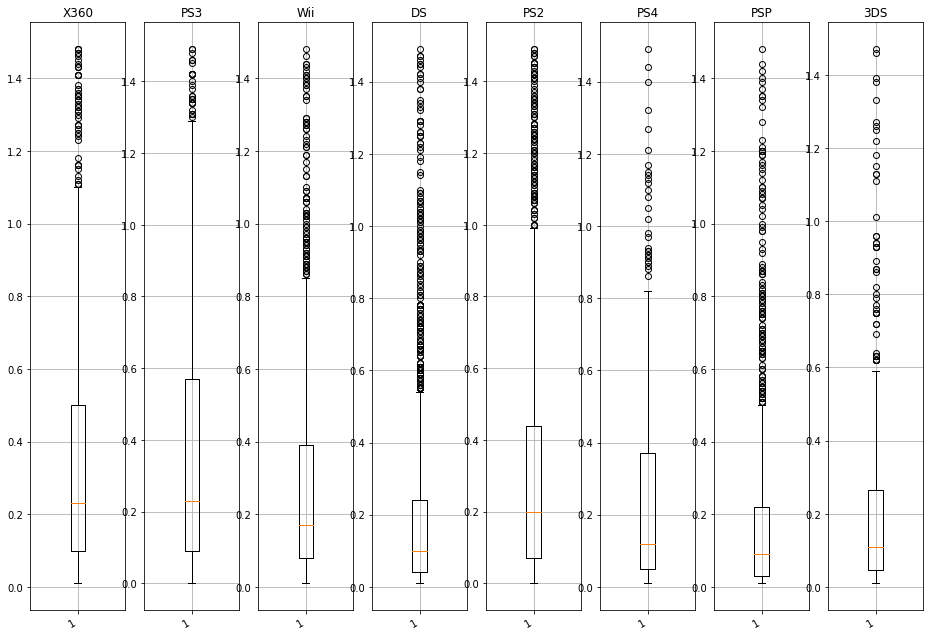

In [68]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(nrows=1, ncols=8, figsize=(16, 12))
fig.autofmt_xdate();

p = {ax1:'X360', ax2:'PS3', ax3:'Wii', ax4:'DS', ax5:'PS2', ax6:'PS4', ax7:'PSP', ax8:'3DS'}
for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]:
    sales = df.query('platform==@p[@ax] and sales<1.5')['sales']
    ax.boxplot(sales)
    ax.grid()
    ax.set_title(p[ax])

fig.autofmt_xdate()

Вывод: Продажи на популярных платформах схожи. Медианные значения продаж у четырех X360, PS3, Wii, PS2 находятся близко к уровню 0,2, а в других 4 к уровню 0,1. На платформах 3DS,DS и PSP большая часть проданых игр лежит до значения в 0,5-0,6, на платформах PS4, Wii и PS2 до 0,85-1, а в лидерах X360 до 1,1 и в PS3 до 1,3млн

# 3.5 Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Влияние Продажи-Отзывы на одной популярной платформе

In [69]:
top8

,platform,sales
0,X360,966.61
1,PS3,935.19
2,Wii,903.31
3,DS,786.99
4,PS2,427.39
5,PS4,314.14
6,PSP,286.51
7,3DS,258.51


Для примера возьмём самую популярную платформу Х360

In [70]:
one_pl = df.query('platform=="X360"')[['sales', 'critic_score', 'user_score']].dropna().reset_index(drop=True)
one_pl

,sales,critic_score,user_score
0,21.82,61.0,6.3
1,16.27,97.0,8.1
2,14.73,88.0,3.4
3,14.62,87.0,6.3
4,13.68,83.0,4.8
...,...,...,...
996,0.01,65.5,6.2
997,0.01,57.0,6.6
998,0.01,62.0,7.0
999,0.01,49.0,2.1


In [71]:
one_pl.corr()

,sales,critic_score,user_score
sales,1.000000,0.388744,0.115414
critic_score,0.388744,1.000000,0.644475
user_score,0.115414,0.644475,1.000000


Коэффициент Зависимости Продаж от отзывов критиков = 0.3887436429125496


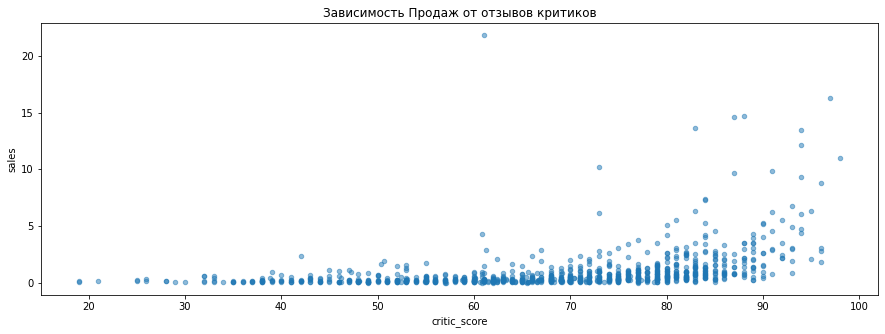

In [72]:
print('Коэффициент Зависимости Продаж от отзывов критиков =' , one_pl['sales'].corr(one_pl['critic_score']))
one_pl.plot(x='critic_score',y='sales',kind='scatter',figsize=(15,5), alpha=0.5)
plt.title('Зависимость Продаж от отзывов критиков');

Коэффициент Зависимости Продаж от отзывов пользователей = 0.11541413231359876


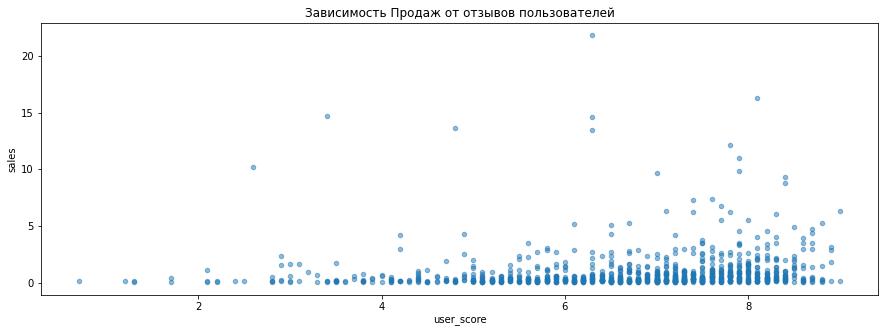

In [73]:

print('Коэффициент Зависимости Продаж от отзывов пользователей =' , one_pl['sales'].corr(one_pl['user_score']))
one_pl.plot(x='user_score',y='sales',kind='scatter',figsize=(15,5), alpha=0.5)
plt.title('Зависимость Продаж от отзывов пользователей');

Вывод: По платформе X360: Отзывы критиков важны, хотя зависимость продаж от них находится на уровне средней на границе со слабой(коэффициент 0,39); зависимость здесь прямопропорцианальная - чем выше оценка, тем выше продажи. И зависимость продаж от отзывов пользователей, как выясняется слабая, но ближе к средней, также она прямопропорцианальная(хотя коэффициент значительно меньше - 0,115). В общем зависимости схожи.

# 3.6 Соотнесите выводы с продажами игр на других платформах

In [74]:
top8

,platform,sales
0,X360,966.61
1,PS3,935.19
2,Wii,903.31
3,DS,786.99
4,PS2,427.39
5,PS4,314.14
6,PSP,286.51
7,3DS,258.51


Создадим словарь sal_scor - Платформа:DataFrame (с продажами и отзывами)

In [75]:
sal_scor = {}
for p in top8['platform']:
    sal_scor[p] = df.query('platform==@p')[['sales', 'critic_score', 'user_score']].dropna().reset_index(drop=True)

Запишем в таблицу corr8 корелляции продаж с отзывами по топ8 платформам

In [76]:
i=0
corr8 = pd.DataFrame(columns=['platform','crit_sale','user_sale'])
for pl_name in sal_scor.keys():
    corr8.loc[i, 'platform'] = pl_name
    corr8.loc[i, 'crit_sale'] = sal_scor[pl_name]['sales'].corr(sal_scor[pl_name]['critic_score'])
    corr8.loc[i, 'user_sale'] = sal_scor[pl_name]['sales'].corr(sal_scor[pl_name]['user_score'])
    i+=1

In [77]:
corr8

,platform,crit_sale,user_sale
0,X360,0.388744,0.115414
1,PS3,0.414257,0.127007
2,Wii,0.173527,0.117686
3,DS,0.232881,0.15153
4,PS2,0.390355,0.19249
5,PS4,0.407346,-0.034007
6,PSP,0.31236,0.243794
7,3DS,0.341026,0.229635


Теперь нарисуем зависимости на графиках

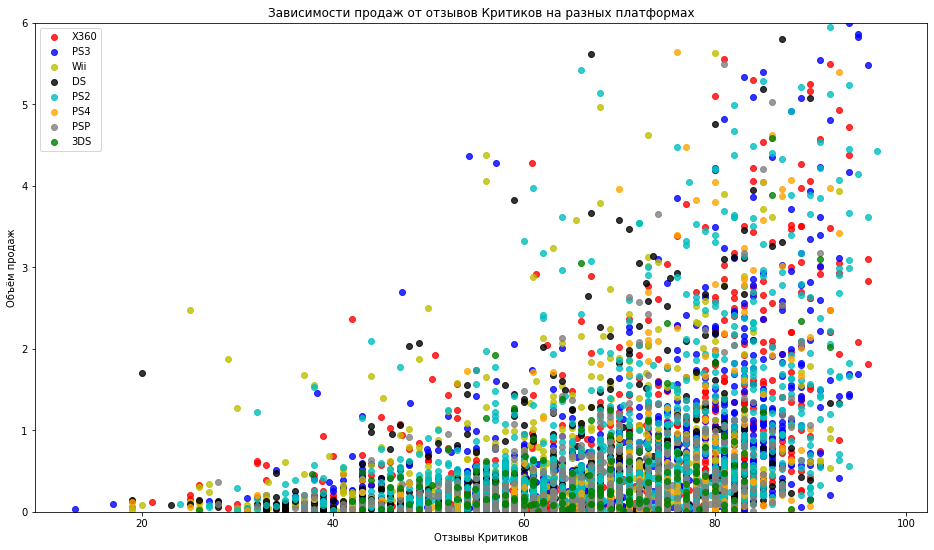

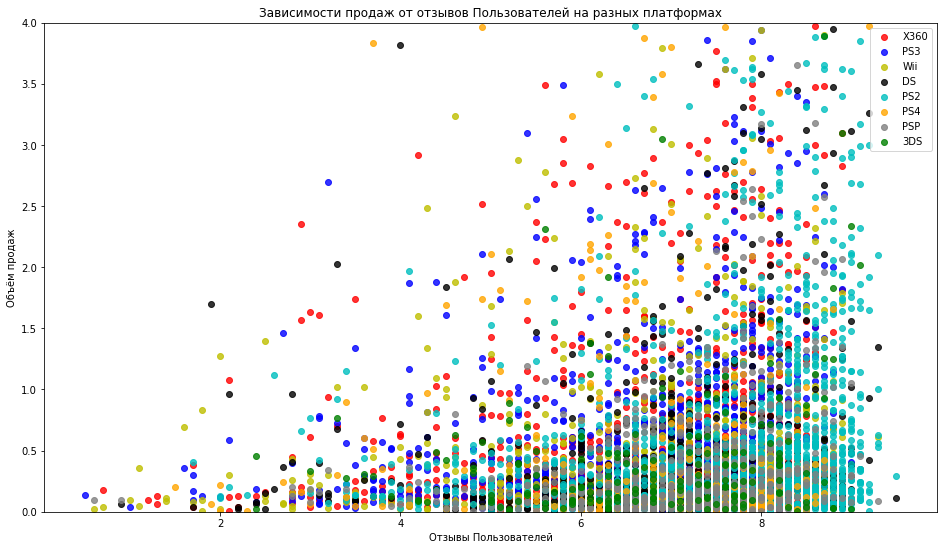

In [78]:
# ==Зависимости продаж от отзывов Критиков
plt.figure(figsize=(16, 9))
plt.grid()
plt.title('Зависимости продаж от отзывов Критиков на разных платформах')
i=0
for p in corr8['platform']:
    xc = sal_scor[p]['critic_score'].to_list()
    yc = sal_scor[p]['sales'].to_list()
    plt.scatter(xc, yc, label=p, color=color[i], alpha=0.8);
    i+=1 
plt.ylim(0,6)
plt.grid()
plt.xlabel('Отзывы Критиков')    
plt.ylabel('Объём продаж')
plt.legend()
plt.show();

# ==Зависимости продаж от отзывов Пользователей
plt.figure(figsize=(16, 9))
plt.grid()
plt.title('Зависимости продаж от отзывов Пользователей на разных платформах')
i=0
for p in corr8['platform']:
    xc = sal_scor[p]['user_score'].to_list()
    yc = sal_scor[p]['sales'].to_list()
    plt.scatter(xc, yc, label=p, color=color[i], alpha=0.8);
    i+=1 
plt.ylim(0,4)
plt.grid()
plt.xlabel('Отзывы Пользователей')    
plt.ylabel('Объём продаж')
plt.legend()
plt.show();

In [79]:
corr8

,platform,crit_sale,user_sale
0,X360,0.388744,0.115414
1,PS3,0.414257,0.127007
2,Wii,0.173527,0.117686
3,DS,0.232881,0.15153
4,PS2,0.390355,0.19249
5,PS4,0.407346,-0.034007
6,PSP,0.31236,0.243794
7,3DS,0.341026,0.229635


Вывод: Схожие тенденции имеют место почти для всех платформ. Зависимость продаж пропорцианальная,- от отзывов критиков слабая но ближе к средней, а от отзывов пользователей значительно слабее, чем критиков, во многих её почти нет(более менее очень слабая зависимость присутствует в PSP, 3DS и PS2). Надо сказать об отдельных зависимостях: в PS4 - Пользователи не влияют на продажи, В Wii и DS зависимость Критиков очень слабая.

# 3.7 Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Кол-во игр в жанрах

In [80]:
genres = df.groupby('genre')['name'].count().sort_values(ascending=False)
genres

genre
Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: name, dtype: int64

Кол-во продаж по жанрам

In [81]:
genre_sales = df.groupby('genre')['sales'].sum().sort_values(ascending=False)
genre_sales

genre
Action          1744.17
Sports          1331.27
Shooter         1052.45
Role-Playing     934.56
Platform         827.77
Misc             802.51
Racing           728.67
Fighting         447.53
Simulation       389.97
Puzzle           242.57
Adventure        237.59
Strategy         174.23
Name: sales, dtype: float64

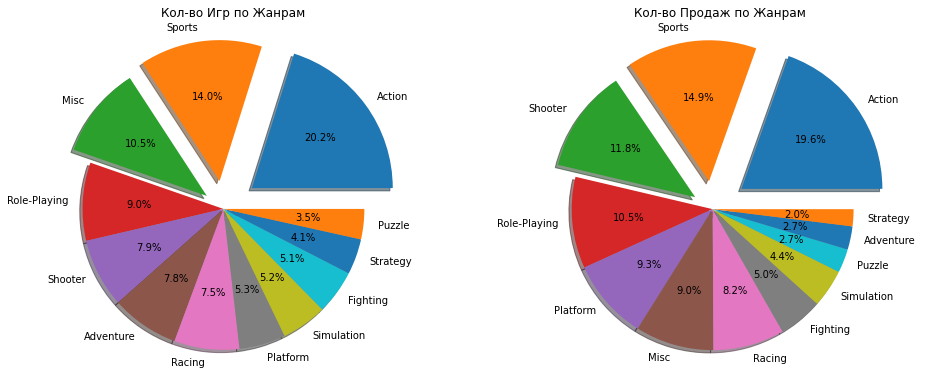

In [82]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 7))
fig.autofmt_xdate();

labels1 = genres.index
sizes1 = genres.values

labels2 = genre_sales.index
sizes2 = genre_sales.values
explode = (0.25, 0.2, 0.15, 0,0,0,0,0,0,0,0,0)
ax1.set_title('Кол-во Игр по Жанрам')
ax1.pie(sizes1, labels=labels1, autopct='%1.1f%%',
        shadow=True, explode=explode,startangle=0)  
ax1.axis('equal')

ax2.set_title('Кол-во Продаж по Жанрам')
ax2.pie(sizes2, labels=labels2, autopct='%1.1f%%',
        shadow=True, explode=explode,startangle=0) 
ax2.axis('equal')

plt.show()

# fig.autofmt_xdate();

Вывод: Общее распределение игр по жанрам - в тройку лидеров входят Action(20,2%), Sports(14%) и Sports(10,5%); аутсайдеры здесь Puzzle(3,5%), Strategy(4,1%) и Fighting(5,1%)

В продажах по жанрам в лидерах опять Action(19,6%), Sports(14,9%), но на 3 месте уже Shooter(11,8); аутсайдеры здесь Strategy(2%), Puzzle(2,7%) как и в первом графике, но 3 место у Adventure(2,7%).
Можно отметить, что продажи лидера Action и аутсайдера Strategy отличаются в 10 раз

# Шаг 4. Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
• Самые популярные платформы (топ-5). Опишите различия в долях продаж.
• Самые популярные жанры (топ-5). Поясните разницу.
• Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Самые популярные платформы в регионах (топ-5). Опишите различия в долях 

Запишем в словарь popul_5platf_dict данные по продажам топ-5 платформ в 3 регионах {region:df}

In [83]:
popul_5platf_dict = {}
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    popul_5platf_dict[region] = df.groupby('platform')[region].sum().sort_values(ascending=False).head(5)
popul_5platf_dict

{'na_sales': platform
 X360    602.47
 PS2     583.84
 Wii     496.90
 PS3     393.49
 DS      382.40
 Name: na_sales, dtype: float64,
 'eu_sales': platform
 PS2     339.29
 PS3     330.29
 X360    270.76
 Wii     262.21
 PS      213.61
 Name: eu_sales, dtype: float64,
 'jp_sales': platform
 DS      175.57
 PS      139.82
 PS2     139.20
 SNES    116.55
 3DS     100.67
 Name: jp_sales, dtype: float64}

Теперь отразим это все на графиках

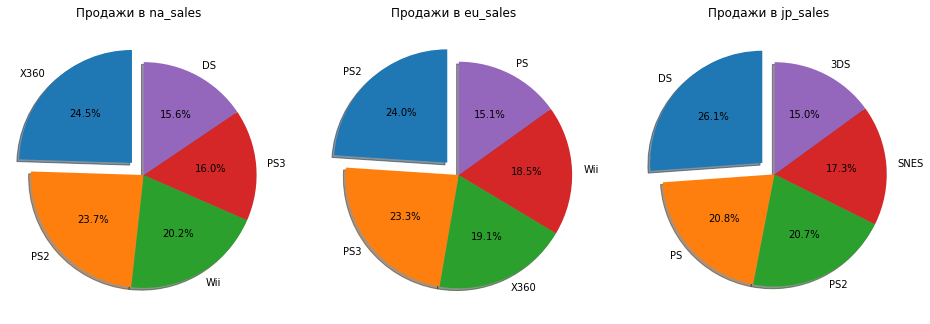

In [84]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
fig.autofmt_xdate();

i = 0
x = [ax1, ax2, ax3]
region = ['na_sales', 'eu_sales', 'jp_sales']
explode = (0.15, 0, 0, 0, 0)

for i in [0,1,2]:
    labels = popul_5platf_dict[region[i]].index
    sizes = popul_5platf_dict[region[i]].values
    ax = x[i]
    ax.set_title(f'Продажи в {region[i]}')
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode,startangle=90) 
    ax.axis('equal')  

plt.show()

Вывод: Лидеры продаж во всех регионах разные: Америка - X360, Европа - PS2 и Япония - DS. В Америке и Европе пользуются в основном одними и теми же 4 платформами - X360, PS2, Wii, PS3, исключение в Америке любят болше DS,а в Европе PS. В Японии совсем другая картина: тут более популярны платформы DS, SNES и 3DS. Надо отметить, что платформа PS2 очень популярна во всех регионах.

### Самые популярные жанры в регионах (топ-5). Поясните разницу 

Запишем в словарь popul_5genre_dict данные по продажам топ-5 жанрам в 3 регионах {region:df}

In [85]:
popul_5genre_dict = {}
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    popul_5genre_dict[region] = df.groupby('genre')[region].sum().sort_values(ascending=False).head(5)
popul_5genre_dict

{'na_sales': genre
 Action      879.01
 Sports      684.43
 Shooter     592.24
 Platform    445.50
 Misc        407.27
 Name: na_sales, dtype: float64,
 'eu_sales': genre
 Action     519.13
 Sports     376.79
 Shooter    317.34
 Racing     236.51
 Misc       212.74
 Name: eu_sales, dtype: float64,
 'jp_sales': genre
 Role-Playing    355.41
 Action          161.43
 Sports          135.54
 Platform        130.83
 Misc            108.11
 Name: jp_sales, dtype: float64}

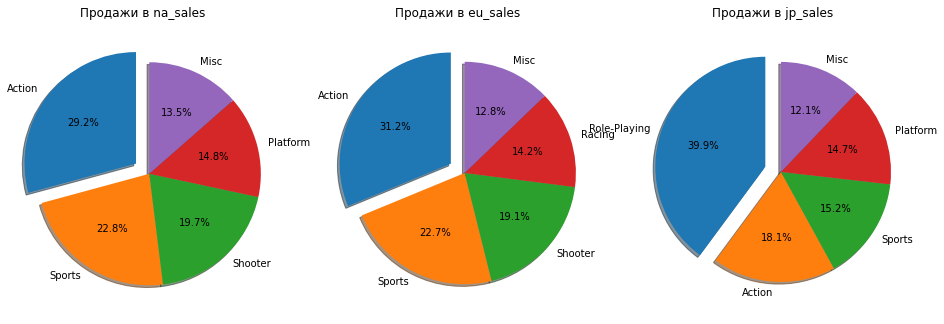

In [86]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
fig.autofmt_xdate();

i = 0
x = [ax1, ax2, ax3]
region = ['na_sales', 'eu_sales', 'jp_sales']
explode = (0.15, 0, 0, 0, 0)

for i in [0,1,2]:
    labels = popul_5genre_dict[region[i]].index
    sizes = popul_5genre_dict[region[i]].values
    ax = x[i]
    ax.set_title(f'Продажи в {region[i]}')
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode,startangle=90) 
    ax.axis('equal')  

plt.show()

Вывод: В Америке и Европе совпадают топ-3 жанра Action, Sports и Shoter, а также совпадает на 5 месте Misc(даже и в Японии тоже на 5 месте); различия на 4 месте в Америке Platform, а в Европе Racing. Наверно это можно объяснить общей культурой и менталитетом и конечно же языками - английский, испанский, французский, итальянский. В Японии же другая культура и язык совсем другой (больше 95% японцев в Японии говорят только на японском) поэтому и лидирует жанр Role-Playing, хотя тоже очень популярны Action и Sports, присутствует жанр Platform как и в Америке на 4 месте

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [87]:
# -NA популярность рейтингов у американцев
na_popular_ratings = df.groupby('rating').sum().na_sales
na_popular_ratings

rating
AO         1.26
E       1342.70
E10+     365.40
EC         2.04
K-A        2.59
M        768.59
RP         0.00
T        785.59
Name: na_sales, dtype: float64

In [88]:
# - EA популярность рейтингов у европейцев
eu_popular_ratings =  df.groupby('rating').sum().eu_sales
eu_popular_ratings

rating
AO        0.61
E       733.40
E10+    195.56
EC        0.11
K-A       0.29
M       501.98
RP        0.22
T       444.73
Name: eu_sales, dtype: float64

In [89]:
# - JP популярность рейтингов у азиатов
jp_popular_ratings = df.groupby('rating').sum().jp_sales
jp_popular_ratings

rating
AO        0.00
E       211.07
E10+     48.24
EC        0.00
K-A       1.49
M        68.42
RP        0.01
T       164.15
Name: jp_sales, dtype: float64

Вывод: на всёх 3 рынках доминируют игры с рейтингом E.

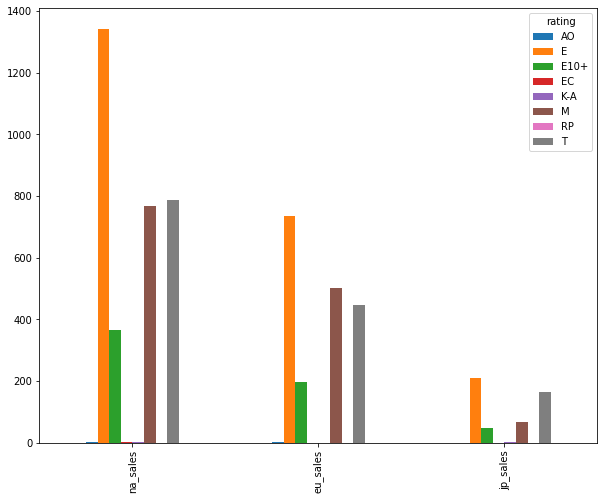

In [90]:
data_to_plot = pd.DataFrame([na_popular_ratings, eu_popular_ratings, jp_popular_ratings])
data_to_plot.plot(kind='bar', figsize=(10,8));

# Шаг 5. Проверьте гипотезы

# 5.1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [91]:
XOne = df.query(' platform == "XOne" ')['user_score'].dropna().to_list()
PC = df.query(' platform == "PC" ')['user_score'].dropna().to_list()

In [92]:
print('Дисперсия XOne =', np.var(XOne), '// Дисперсия PC =', \
      np.var(PC))

Дисперсия XOne = 1.8634457740779282 // Дисперсия PC = 2.3082122042634463


Дисперсии отличаются (около 24%), поэтому возьмем equal_var=False

Так как нам не нужны сверх точные значения, то укажем критический уровень статистической значимости 5% alpha = 0.05

По заданию надо проверить гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Так как H₀ всегда формулируется так, чтобы использовать знак равенства, то нулевую гипотезу сформулируем также (как по заданию): Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; альтернативная гипотеза H₁ тогда будет такая - Средние пользовательские рейтинги платформ Xbox One и PC различны.

In [93]:
from scipy import stats as st

alpha = 0.05

results = st.ttest_ind(XOne, PC, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.3054814489242006e-06
Отвергаем нулевую гипотезу


Вывод: Нулевая гипотеза отвергнута - это значит, что и Гипотеза №1 отвергнута, а Средние пользовательские рейтинги платформ Xbox One и PC различны

# 5.2. Средние пользовательские рейтинги жанров Action и Sports разные

In [94]:
Action = df.query(' genre == "Action" ')['user_score'].dropna().to_list()
Sports = df.query(' genre == "Sports" ')['user_score'].dropna().to_list()

In [95]:
print('Дисперсия Action =', np.var(Action), '// Дисперсия Sports =', \
      np.var(Sports))

Дисперсия Action = 1.8898461060761904 // Дисперсия Sports = 2.2897868995354185


Дисперсии отличаются не сильно (около 21%), поэтому возьмем equal_var=True

Так как нам не нужны сверх точные значения, то укажем критический уровень статистической значимости 5% alpha = 0.05

По заданию надо проверить гипотезу: Средние пользовательские рейтинги жанров Action и Sports разные.

Так как H₀ всегда формулируется так, чтобы использовать знак равенства то нулевую гипотезу сформулируем так: Средние пользовательские рейтинги жанров Action и Sports равны; альтернативная гипотеза H₁ тогда будет такая - Средние пользовательские рейтинги жанров Action и Sports разные (как по заданию).

In [96]:
from scipy import stats as st

alpha = 0.05

results = st.ttest_ind(Action, Sports, equal_var = True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.16769478776683688
Не получилось отвергнуть нулевую гипотезу


Вывод: Не получилось отвергнуть нулевую гипотезу - это значит, что Гипотеза №2 отвергнута, а Средние пользовательские рейтинги жанров Action и Sports одинаковые

# Шаг 6. Напишите общий вывод

В ходе предобработки:

1. в Столбце name удалено 2 строки , применяли лемматизацию для поиска схожих имен, но в итоге дубликатов не нашли
2. Столбец year_of_release - Осталось 146 пропусков, удалять строки с ними не будем (пока), возможно пригодятся значения с продажами.
3. Столбец critic_score и user_score заполнены на 8,7 тыс строк.
4. Столбец rating - Удалось заполнить совсем не много - 437 пропусков.
5. Оставшиеся пропуски заполнить не вижу возможности (логически/по_смыслу), если заполнять медианами, средними , то это может непредсказуемо отразиться на результатах будущего анализа данных.
6. Дубликатов не выявленно
7. Хоть данные очень не полные, придется оставить как есть. Будем использовать для анализа то, что имеем.
8. По заданию добавлен столбец sales с суммой всех продаж в регионах

В ходе анализа было выявлено:

1. Период до 1994 года характеризуется малой активностью. Хорошо видно, что важный период в релизах игр наступает в 1994 году - и после него начинается бум - компьютерные игры захватывают мир. В 2010 наступает переломный момент и уже в 2012 релизы падают в 2 раза и до 2016 держатся примерно на одном уровне
2. Срок активного существования платформ 10-12 лет. Можно выделить из списка платформ - "PC" (компьютеры, наверное), они хоть и не в топах по выручке, но актуальны во все времена. Также надо отметить,что платформа "DS" просуществовала очень долго - до 2013 года.
3. По прогнозу на 2017 год можно сказать: Флагманы - PS4 и XOne! PSV, WiiU и 3DS - тоже можно продолжать развивать, но в меньших объемах(PSV - развитие идет слабо, поэтому приоритет у WiiU и 3DS); платформа PC - актуальна всегда(но в малых объемах), поэтому надо поддерживать её развитие
4. Схожие тенденции имеют место почти для всех платформ. Зависимость продаж прямопропорцианальная,- от отзывов критиков слабая но ближе к средней, а от отзывов пользователей значительно слабее, чем критиков, во многих её почти нет(очень слабая зависимость присутствует в PSP, 3DS и PS2). Надо сказать об отдельных зависимостях: в PS4 - Пользователи не влияют на продажи, а в Wii и DS зависимость Критиков очень слабая.
5. Общее распределение игр по жанрам - в тройку лидеров входят Action(20,2%), Sports(14%) и Sports(10,5%); аутсайдеры здесь Puzzle(3,5%), Strategy(4,1%) и Fighting(5,1%). В продажах по жанрам в лидерах опять Action(19,6%), Sports(14,9%), но на 3 месте уже Shooter(11,8); аутсайдеры здесь Strategy(2%), Puzzle(2,7%) как и в первом графике, но 3 место у Adventure(2,7%). Можно отметить, что продажи лидера Action и аутсайдера Strategy отличаются в 10 раз.

Портрет пользователя каждого региона:

1. Лидеры продаж во всех регионах разные: Америка - X360, Европа - PS2 и Япония - DS. В Америке и Европе пользуются в основном одними и теми же 4 платформами - X360, PS2, Wii, PS3, исключение в Америке любят болше DS,а в Европе PS. В Японии совсем другая картина: тут более популярны платформы DS, SNES и 3DS. Надо отметить, что платформа PS2 очень популярна во всех регионах.
2. В Америке и Европе совпадают топ-3 жанра Action, Sports и Shoter, а также совпадает на 5 месте Misc(даже и в Японии тоже на 5 месте); различия на 4 месте в Америке Platform, а в Европе Racing. В Японии же другая культура поэтому и лидирует жанр Role-Playing, хотя тоже очень популярны Action и Sports, присутствует жанр Platform как и в Америке на 4 месте
3. Влияние рейтинга ESRB на продажи в разных регионах почти одинаково. На первом месте «E» и далее «T»,«M» и «E10+»

Проверены гипотезы:

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
2. Средние пользовательские рейтинги жанров Action и Sports разные
Обе гипотезы отвергнуты.